In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ted_talks_data/data.csv')
df.dropna(inplace=True)
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [3]:
### Finding the most popular TED_talks
df.sort_values(by=['views'], ascending=False)[:5]
# df.sort_values(by=['likes'], ascending=False)[:5]

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...


In [4]:
### Finding the most popular TED talks Speaker (in terms of number of talks)
len(df['title'].unique())
df.groupby(by=['author']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)[:5]

,author,counts
148,Alex Gendler,45
1781,Iseult Gillespie,33
2845,Matt Walker,18
152,Alex Rosenthal,15
1283,Elizabeth Cox,13


In [5]:
### Month-wise Analysis of TED talk frequency
df['date'] = df.date.str.replace(' ', '')
df['date'] = df.date.str.replace('January', '01/')
df['date'] = df.date.str.replace('February', '02/')
df['date'] = df.date.str.replace('March', '03/')
df['date'] = df.date.str.replace('April', '04/')
df['date'] = df.date.str.replace('May', '05/')
df['date'] = df.date.str.replace('June', '06/')
df['date'] = df.date.str.replace('July', '07/')
df['date'] = df.date.str.replace('August', '08/')
df['date'] = df.date.str.replace('September', '09/')
df['date'] = df.date.str.replace('October', '10/')
df['date'] = df.date.str.replace('November', '11/')
df['date'] = df.date.str.replace('December', '12/')
df['date'] = pd.to_datetime(df['date'], format='%m/%Y')
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,2021-12-01,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,2022-02-01,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,2021-09-01,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2021-10-01,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


<AxesSubplot:xlabel='date'>

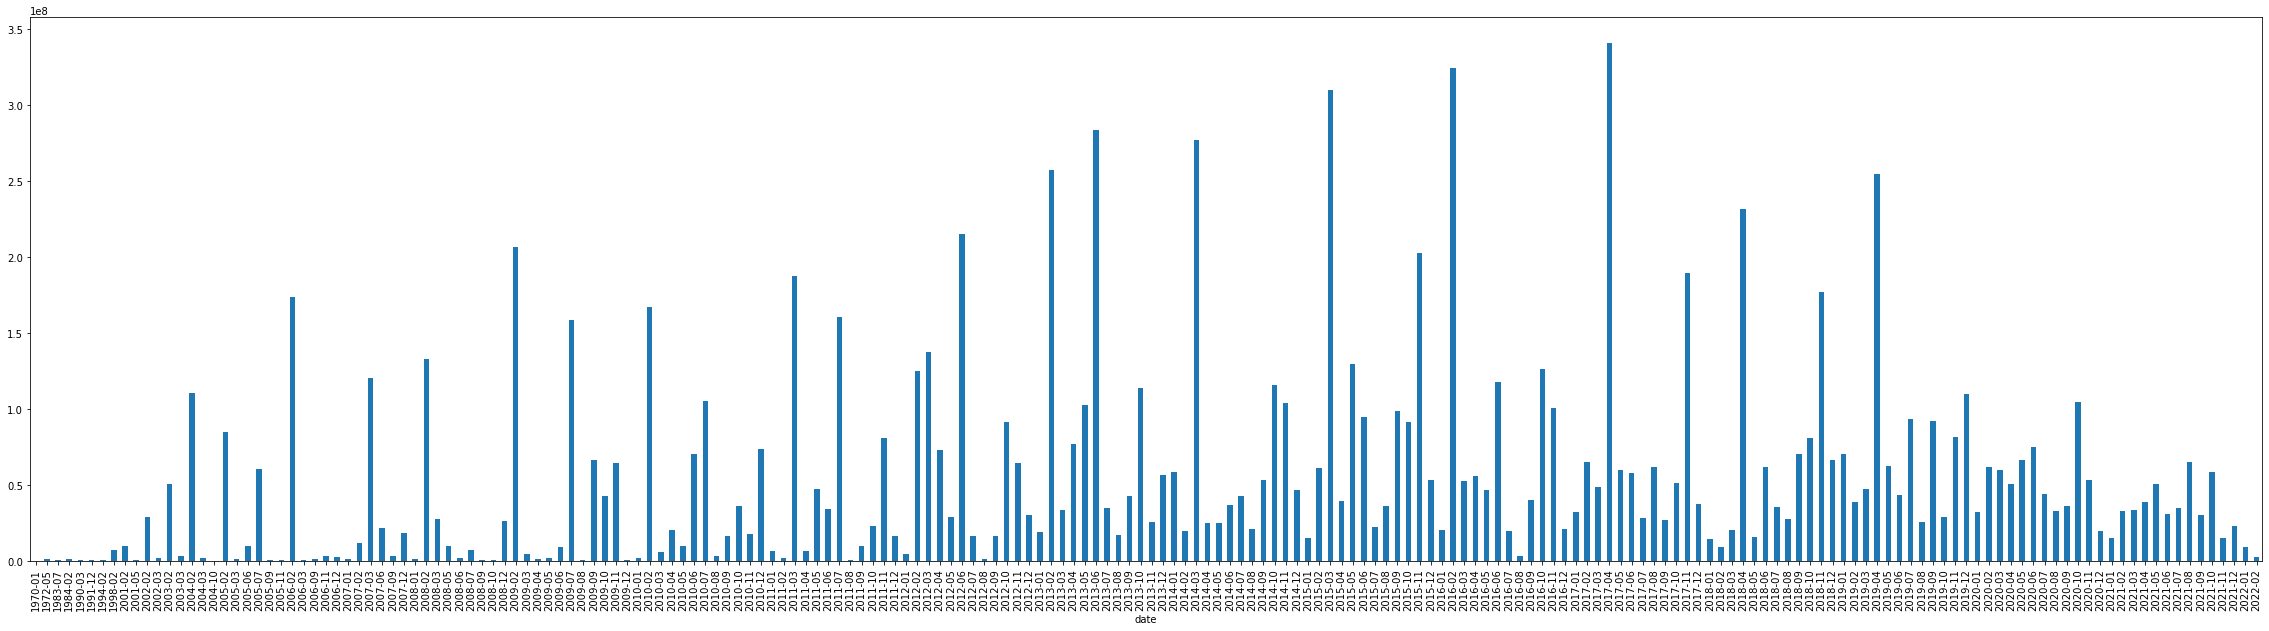

In [6]:
df['views'].groupby(df['date'].dt.to_period('M')).sum().plot(kind='bar', figsize=(40,10))

<AxesSubplot:xlabel='date'>

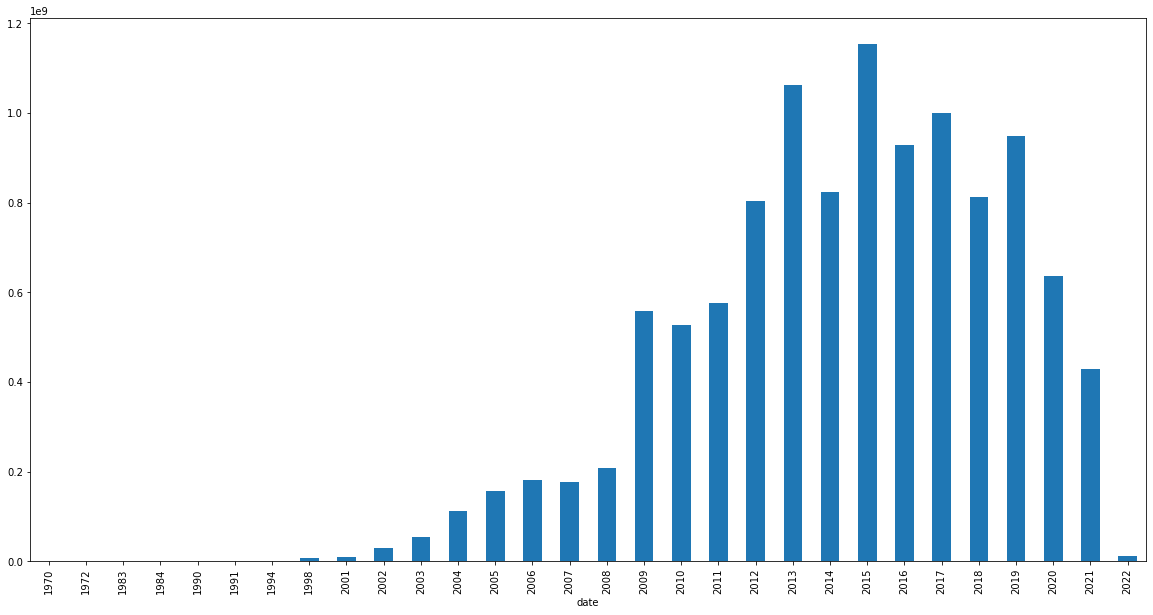

In [7]:
### Year-wise Analysis of TED talk frequency
df['views'].groupby(df['date'].dt.to_period('Y')).sum().plot(kind='bar', figsize=(20,10))

In [8]:
### Finding TED talks of your favorite Author
df.loc[df['author'].str.contains("Pedro")]

,title,author,date,views,likes,link
1564,Why do hospitals have particle accelerators?,Pedro Brugarolas,2019-03-01,270000,8100,https://ted.com/talks/pedro_brugarolas_why_do_...
2606,Why do animals have such different lifespans?,Joao Pedro de Magalhaes,2017-04-01,5100000,154000,https://ted.com/talks/joao_pedro_de_magalhaes_...


In [9]:
### Finding TED talks with the best view to like ration
df['ratio'] = df['views']/df['likes']
df.sort_values(by=['ratio'], ascending=False)

,title,author,date,views,likes,link,ratio
955,A camera that can see around corners,David Lindell,2019-11-01,364000,10000,https://ted.com/talks/david_lindell_a_camera_t...,36.400000
905,What's the point(e) of ballet?,Ming Luke,2020-04-01,364000,10000,https://ted.com/talks/ming_luke_what_s_the_poi...,36.400000
837,How to see more and care less: The art of Geor...,Iseult Gillespie,2020-06-01,364000,10000,https://ted.com/talks/iseult_gillespie_how_to_...,36.400000
26,Can you outsmart the fallacy that divided a na...,Elizabeth Cox,2022-02-01,363000,10000,https://ted.com/talks/elizabeth_cox_can_you_ou...,36.300000
1016,The function and fashion of eyeglasses,Debbie Millman,2020-01-01,363000,10000,https://ted.com/talks/debbie_millman_the_funct...,36.300000
...,...,...,...,...,...,...,...
1733,A brie(f) history of cheese,Paul S. Kindstedt,2018-12-01,11000000,358000,https://ted.com/talks/paul_s_kindstedt_a_brie_...,30.726257
3137,Imagining a new future for health systems in A...,Mathieu Lamiaux,2015-06-01,10000,326,https://ted.com/talks/mathieu_lamiaux_imaginin...,30.674847
1462,Solar energy can help put power back in the ha...,Scott Nguyen,2019-04-01,10000,326,https://ted.com/talks/scott_nguyen_solar_energ...,30.674847
1071,Three stories of Scotland,Mackenzie Dalrymple,2019-07-01,11000,359,https://ted.com/talks/mackenzie_dalrymple_thre...,30.640669


In [10]:
### Finding TED talks based on tags(like climate)
df.loc[df['title'].str.contains("climate")]

,title,author,date,views,likes,link,ratio
3,Why is China appointing judges to combat clima...,James K. Thornton,2021-10-01,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,35.583333
17,The ocean's ingenious climate solutions,Susan Ruffo,2021-10-01,522000,15000,https://ted.com/talks/susan_ruffo_the_ocean_s_...,34.800000
18,How we're reducing the climate impact of elect...,Tim Dunn,2022-02-01,96000,2900,https://ted.com/talks/tim_dunn_how_we_re_reduc...,33.103448
34,How to boost nature-based solutions to climate...,Zac Goldsmith,2021-10-01,30000,913,https://ted.com/talks/zac_goldsmith_how_to_boo...,32.858708
44,"The unexpected, underwater plant fighting clim...",Carlos M. Duarte,2021-08-01,786000,23000,https://ted.com/talks/carlos_m_duarte_the_unex...,34.173913
...,...,...,...,...,...,...,...
4892,The science behind a climate headline,Rachel Pike,2009-07-01,1000000,31000,https://ted.com/talks/rachel_pike_the_science_...,32.258065
5226,New thinking on the climate crisis,Al Gore,2008-03-01,2200000,68000,https://ted.com/talks/al_gore_new_thinking_on_...,32.352941
5280,A critical look at geoengineering against clim...,David Keith,2007-09-01,1400000,44000,https://ted.com/talks/david_keith_a_critical_l...,31.818182
5389,Global priorities bigger than climate change,Bjorn Lomborg,2005-02-01,1700000,53000,https://ted.com/talks/bjorn_lomborg_global_pri...,32.075472


In [11]:
### Finding the most popular TED talks Speaker (in terms of number of views)
df['views'].groupby(df['author']).sum().to_frame().reset_index().sort_values(by=['views'], ascending=False)[:5]

,author,views
148,Alex Gendler,187196000
3902,Sir Ken Robinson,95654000
544,Bill Gates,77800000
3895,Simon Sinek,74800000
594,Brené Brown,72000000
